<a href="https://colab.research.google.com/github/amitoshacharya/Telecomm-Churn-EDA/blob/main/Telecomm_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Collectiion

In [81]:
#unzipping file from source to different destination within google drive
import os

path = '/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Telecomm Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

if os.path.exists(path):
    response = 'y'
else:
    #create a kaggle folder in root
    !mkdir -p ~/.kaggle

    #passing API tokens in kaagle.json file within a kaggle folder
    !echo '{"username":"amitoshacharya","key":"a598c7e4efd541ecdcd8052ee36657eb"}' > ~/.kaggle/kaggle.json #create a new API Token and paste it over here

    #viewing contents of kaggle.json
    !cat ~/.kaggle/kaggle.json

    #listing all files in kaggle folder's
    !ls ~/.kaggle

    #This command is setting the permissions of the kaggle.json file to 600, which means that only the owner (the user who created the file) can read and write the file, and nobody else has any permissions.
    ##The first digit specifies the permission settings for the owner (in this case, 6 means read and write permissions)
    ##The second digit specifies the permission settings for the group (which is not relevant in this case, as the file is not being shared with any group)
    ##The third digit specifies the permission settings for all other users (in this case, 0 means no permissions).'''

    !chmod 600 ~/.kaggle/kaggle.json

    #download the dataset <This is a copy and paste API commmand from Kaggle (different for each and every datasets)>
    !kaggle datasets download -d blastchar/telco-customer-churn

    !unzip "/content/telco-customer-churn.zip" -d "/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Telecomm Churn"

    #removing kaggle folder from root
    !rm -r ~/.kaggle

#Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Business Goal:

    1. To find set of costumers those have higly likelihood to get churn and why.
    2. Provide Suggestion to reduce churn rate


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#Dataset

In [83]:
data=  pd.read_csv(f'/content/drive/MyDrive/DATA SCIENCE/Take Aways/7. Data Analysis And ML/Telecomm Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [85]:
data.shape, len(data)

((7043, 21), 7043)

In [86]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
data.tenure.max(),data.tenure.min(), data.tenure.median()

(72, 0, 29.0)

In [89]:
data.isna().sum() #data.isnull.sum() is also same

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [91]:
#since tenure is 0, total charges are made equal to 0
data['TotalCharges'].fillna(0,inplace=True)

**Feature Enineering:** Converting Continuos-Numeric data "Tenure" to Categorical-Ordinal data "Tenure"

In [92]:
data['tenure_status'] = data.tenure.apply(lambda x: 'Low' if x<=15 else "Medium" if x>15 and x<=30 else 'High')
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_status
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Medium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,High
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Low
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Low
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,High


In [93]:
data['TotalCharges']=pd.to_numeric(arg= data['TotalCharges'], errors='coerce')
data['SeniorCitizen']= data['SeniorCitizen'].astype('object')

In [94]:
data[['TotalCharges','SeniorCitizen']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TotalCharges   7032 non-null   float64
 1   SeniorCitizen  7043 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


In [95]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [96]:
data.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_status
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,3
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,High
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,3402


In [97]:
for col in data.describe(include='object'):
  print(col)
  print(data[col].unique())
  print('....'*30)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
........................................................................................................................
gender
['Female' 'Male']
........................................................................................................................
SeniorCitizen
[0 1]
........................................................................................................................
Partner
['Yes' 'No']
........................................................................................................................
Dependents
['No' 'Yes']
........................................................................................................................
PhoneService
['No' 'Yes']
........................................................................................................................
MultipleLines
['No phone service' 'No' 'Yes']
................

Observation:

We notice that there are multiple factors that affect costumer churn and now we will try to explore each one of them

In [98]:
df=data.groupby(['Churn'])['gender'].value_counts()
df.to_dict()

{('No', 'Male'): 2625,
 ('No', 'Female'): 2549,
 ('Yes', 'Female'): 939,
 ('Yes', 'Male'): 930}

In [99]:
churn,gender,count=[],[],[]
for key in df.keys():
  churn.append(key[0])
  gender.append(key[1])
  count.append(df[key])

df2=pd.DataFrame(data={'churn':churn, 'gender':gender, 'count':count})
df2

,churn,gender,count
0,No,Male,2625
1,No,Female,2549
2,Yes,Female,939
3,Yes,Male,930


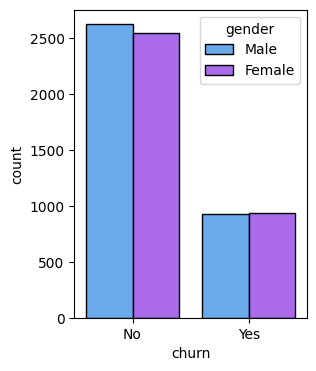

In [100]:
plt.figure(figsize=[3,4])
sns.barplot(data=df2, x='churn',y='count', hue='gender',edgecolor='black',palette= 'cool')
plt.show()

In [101]:
churn_rate = data.Churn.value_counts().to_dict()

In [102]:
list(churn_rate.keys()), list(churn_rate.values())

(['No', 'Yes'], [5174, 1869])

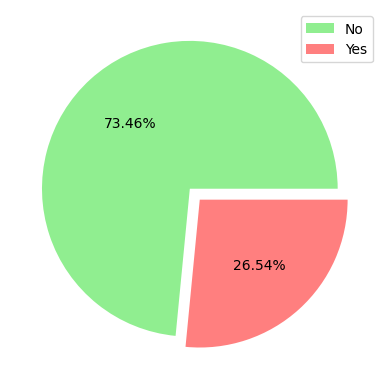

In [103]:
fig,ax=plt.subplots()
plt.pie(x=list(churn_rate.values()), explode= [.05,.05], autopct='%1.2f%%', colors=['#90EE90','#FF7F7F'])

'''for donut
# Add a circle in the center to create the hole
circle = plt.Circle((0,0), radius=.5, color='white')
fig.gca().add_artist(circle)

# Set axis equal to ensure the chart is circular
ax.axis('equal')'''

# Set legend and show the chart
plt.legend(list(churn_rate.keys()), loc='best')
plt.show()

***Data Visualiztion:*** *Function that will subplot all insights on the distribution of pepole in every Telecomm Company's features*

In [104]:
def feature_plot(dataset):
  nr,nc=0,0
  max_col=3
  max_rw=int(len(dataset.describe(include='object').columns)/max_col)
  #print(len(dataset.columns),max_rw, max_col)
  fig, axes=plt.subplots(nrows=max_rw, ncols=max_col, figsize=[15,40])

  for feature in dataset.describe(include='object'):
    df=dataset.groupby(['Churn'])[feature].value_counts()
    #print(feature,end='\n'*3)
    churn,legend,count=[],[],[]
    for key in df.keys():
      churn.append(key[0])
      legend.append(key[1])
      count.append(df[key])


    df2=pd.DataFrame(data={'churn':churn, feature:legend, 'count':count})
    if nr<max_rw:
      ax=sns.barplot(ax=axes[nr, nc],data=df2, x='churn',y='count', hue=feature,palette="Set2", edgecolor='black') #pallet can be set1, set2, set3

      ax.set_title(feature)

    nc+=1
    if nc>(max_col-1):
      nr+=1
      nc=0



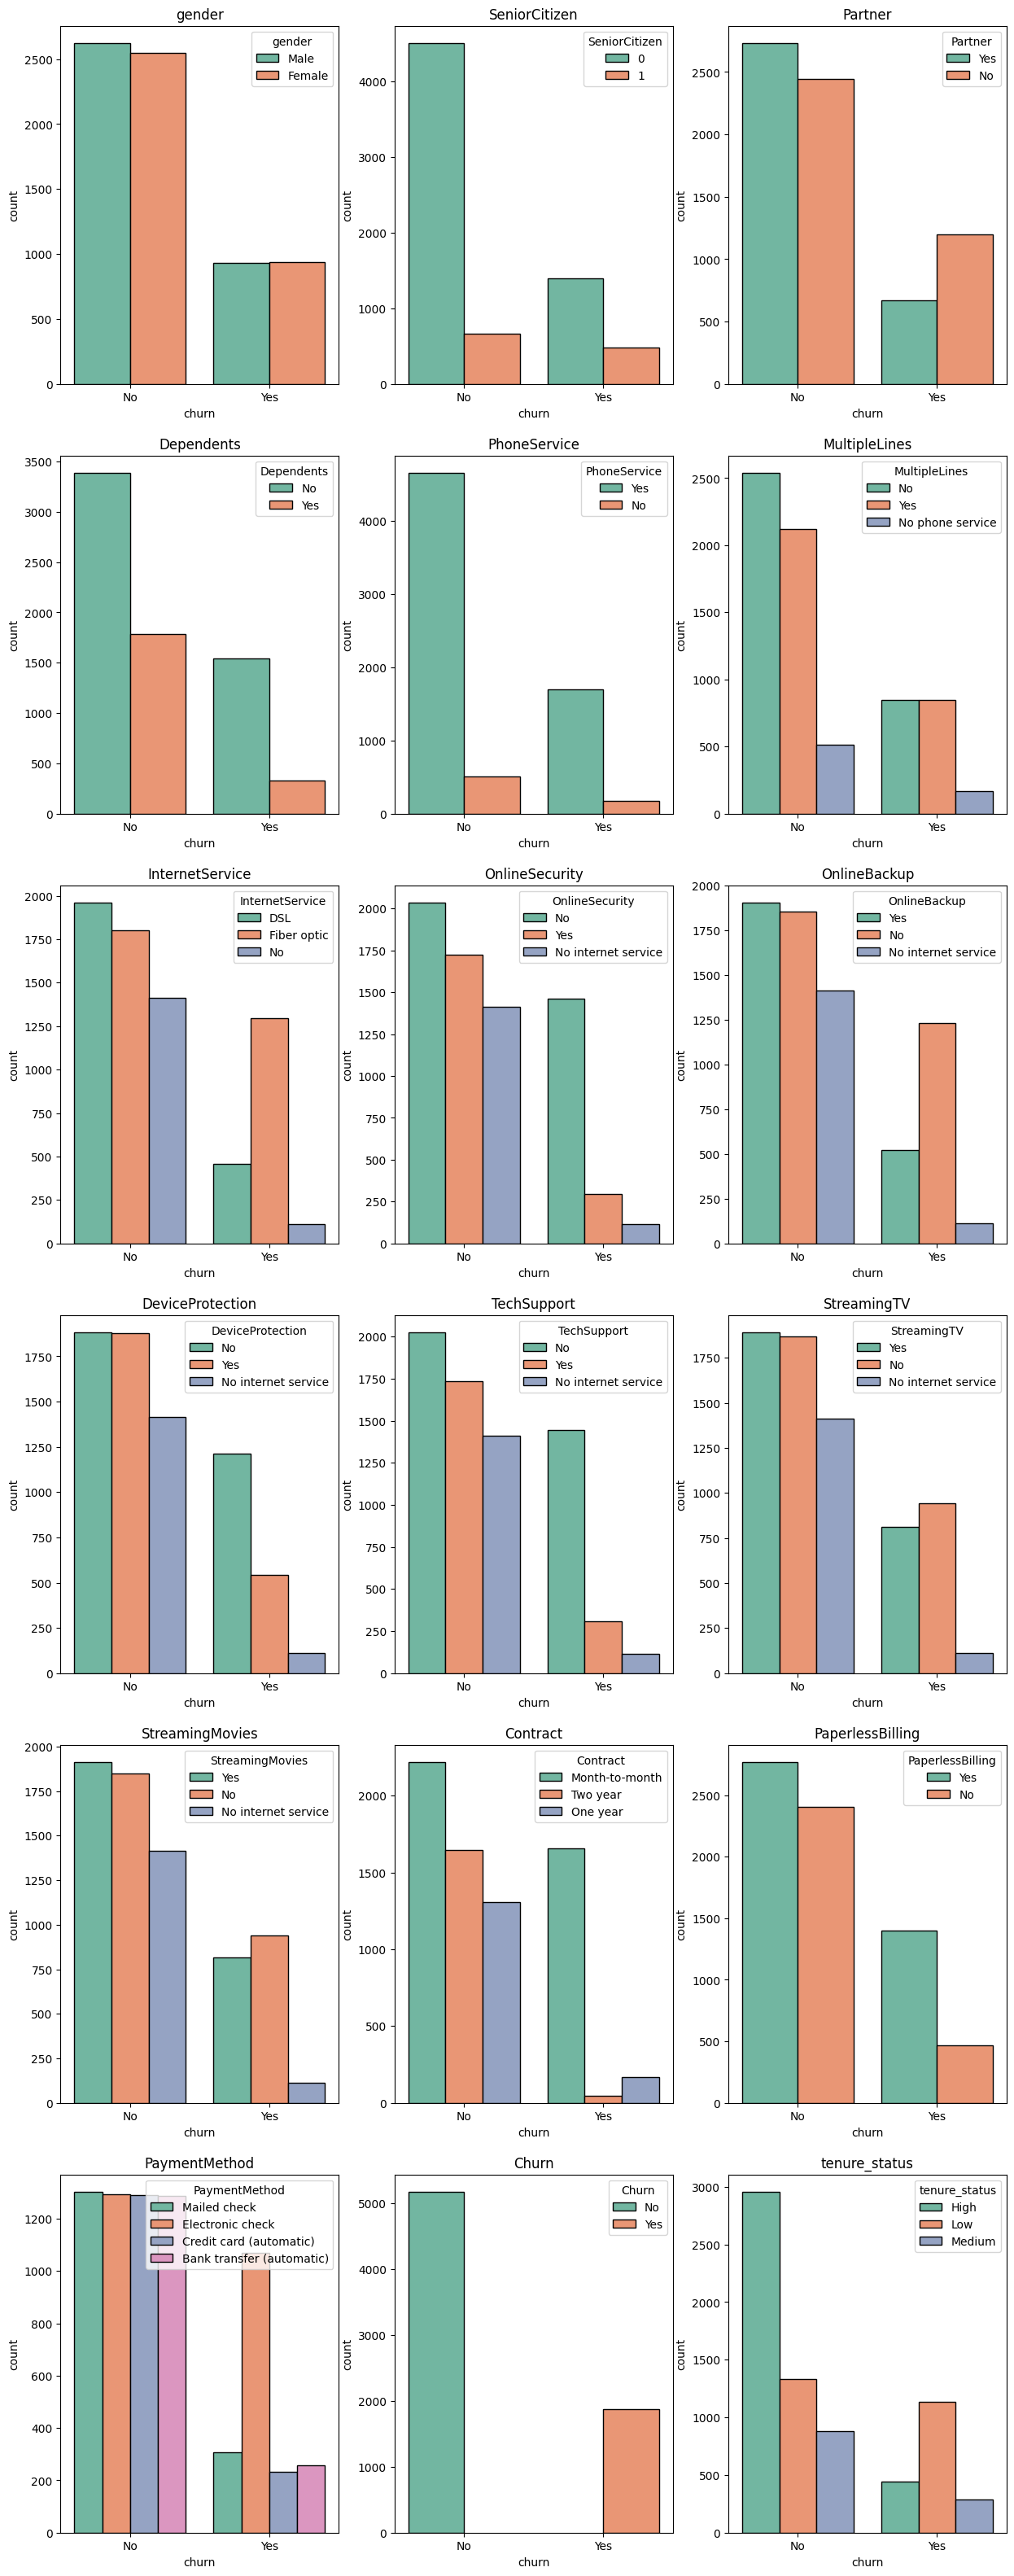

In [105]:
feature_plot(dataset=data.drop(['customerID'],axis=1))

In [106]:
feature_df= dataset=data.drop(['customerID'],axis=1)
feature_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_status
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,High
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,High
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Low


***Data Visualiztion:*** *Function that will subplot all insights on the distribution of pepole that have churned due to every Telecomm Company's features*

In [107]:
def churn_rate_func(df,compare_against_col:str,intrest_val:str):
  inner_df = df.describe(include='object')

  pie_represent={}
  nr,nc=0,0
  max_col=3
  max_rw=int(len(inner_df.columns)/max_col)
  #print(len(inner_df.columns),max_rw, max_col)
  fig, axes=plt.subplots(nrows=max_rw, ncols=max_col, figsize=[15,30])
  #print(fig)
  for feature in inner_df:

    df4=feature_df.groupby([feature])[compare_against_col].value_counts()
    #print(df4)
    df_dict={'Not Area Of Interest':0}
    #print(df4.to_dict())
    for k,v in df4.to_dict():
      if v != intrest_val:
        df_dict['Not Area Of Interest'] = int(df_dict['Not Area Of Interest']) + int(df4.to_dict()[(k,v)])

      else:
        df_dict[k]= int(df4.to_dict()[(k,v)])

    pie_represent[feature] = df_dict

    #print(axes[0,2])
    if nc>(max_col-1):
      nr+=1
      nc=0
    else:
      axes[nr,nc].pie(x=list(pie_represent[feature].values()) ,autopct='%1.1f%%', startangle=90,explode=[.05]*len(list(pie_represent[feature].values())))   # labels=pie_represent[feature].keys()
      sns.color_palette("pastel")   #Deep,Muted,Pastel,Bright,Dark,Colorblind
      axes[nr,nc].set_title(feature)
      axes[nr,nc].legend(pie_represent[feature], loc='best')
      nc+=1


  #print(pie_represent)


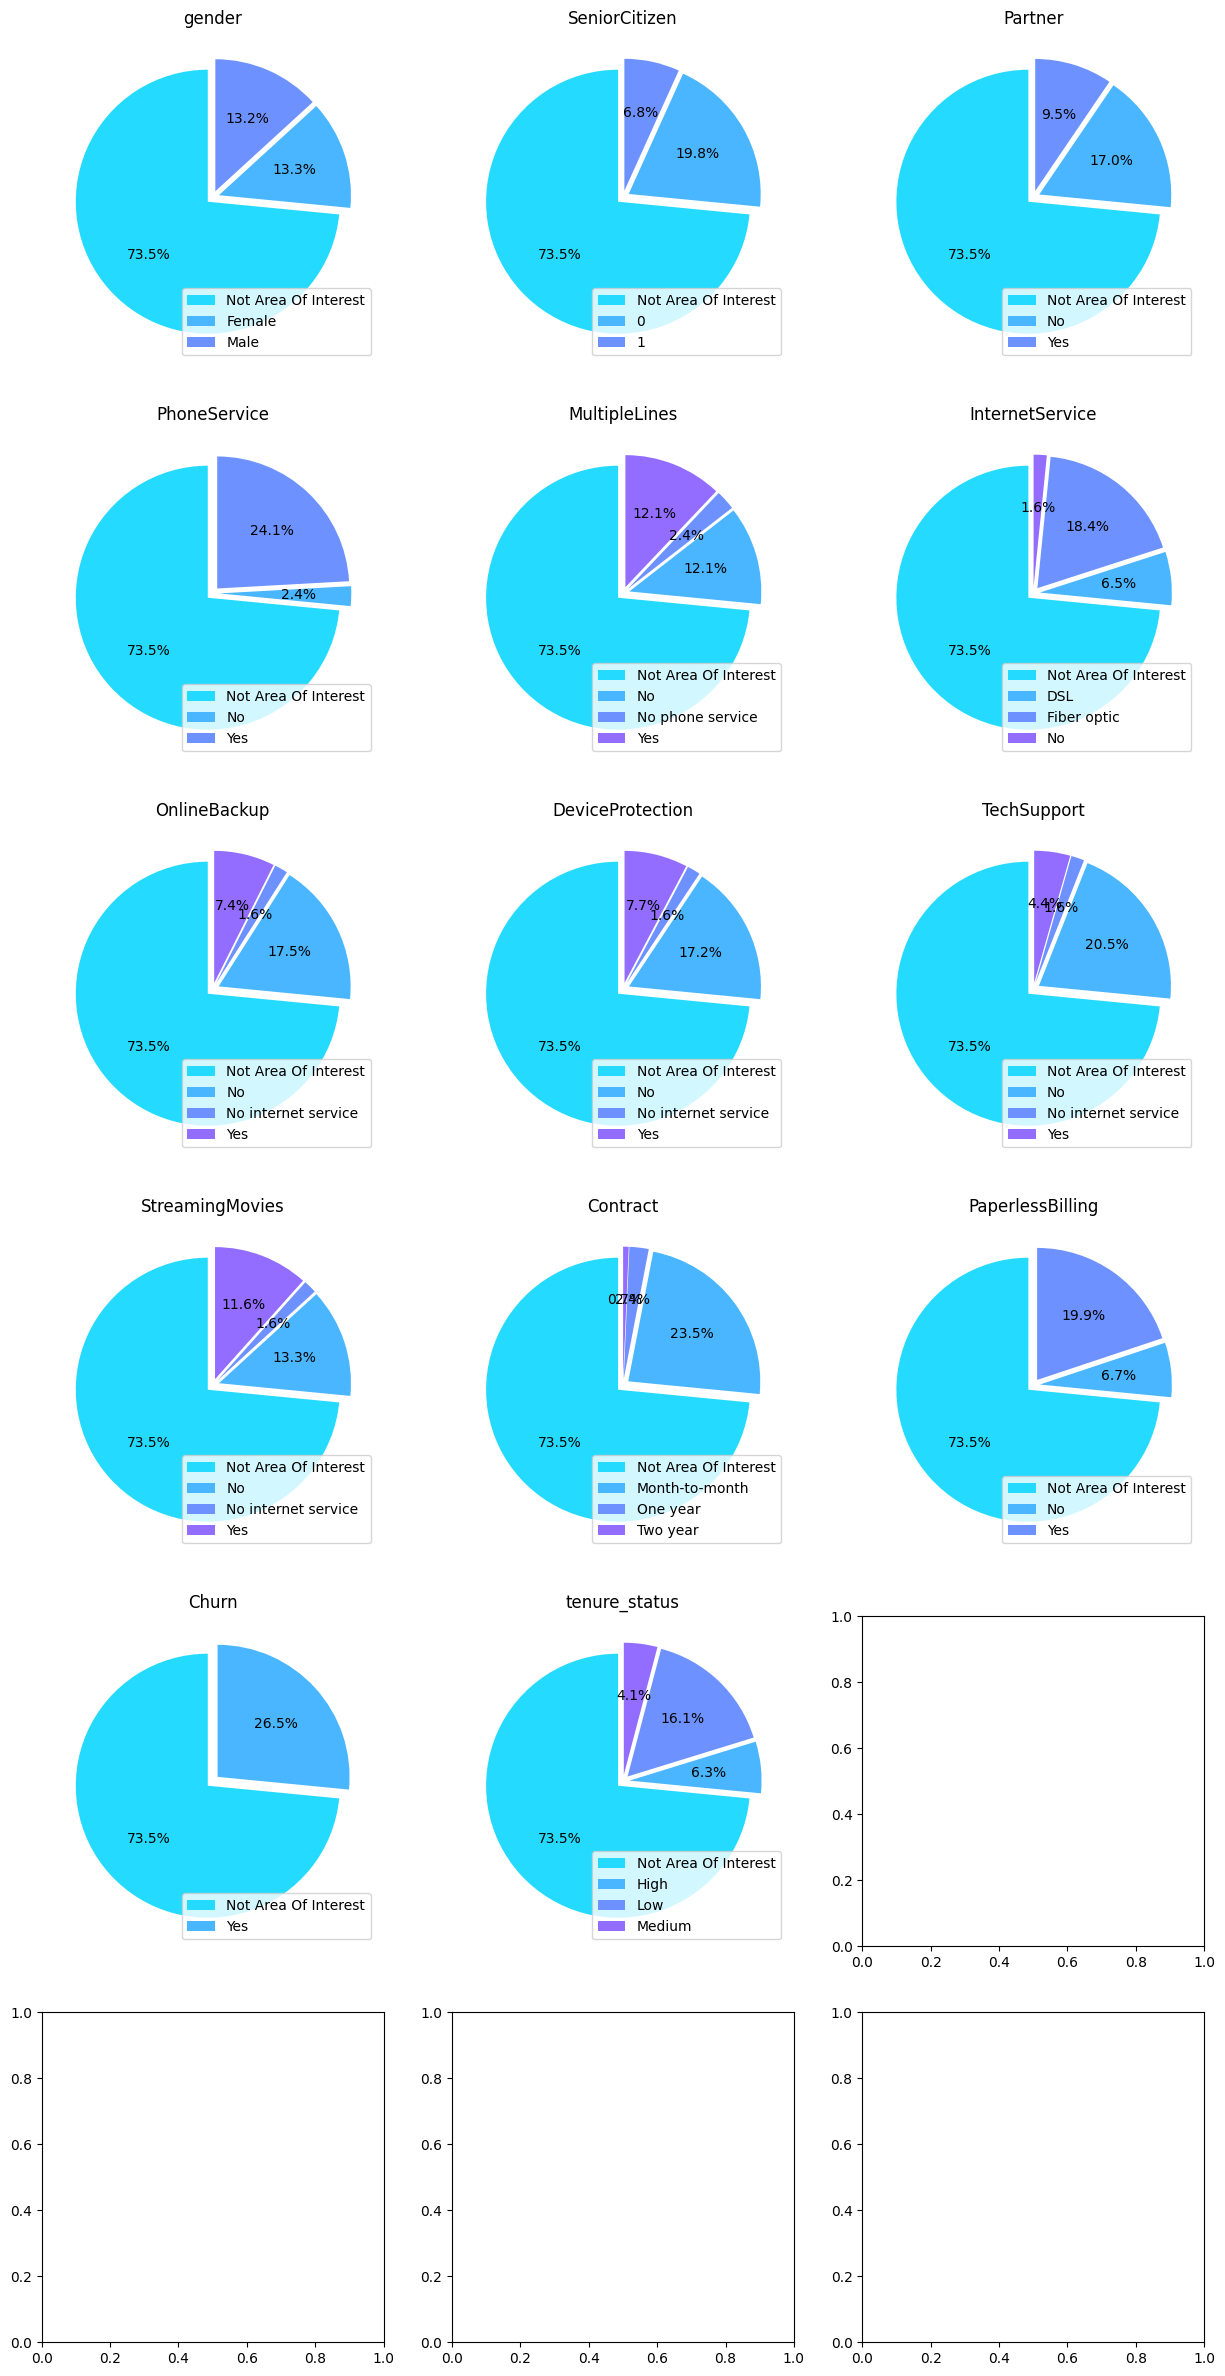

In [108]:
feature_df= dataset=data.drop(['customerID'],axis=1)
churn_rate_func(df=feature_df,compare_against_col='Churn',intrest_val='Yes')

***Conclusion***

percentage of churn (metric defined in churn_rate_func)

***Metric:***

*If the % of churn is approx. or more than 20% then it is consider to have effect.*

    Gender -->  It has no effect on churn rate
    Senior Citizen --> Younger group of people have an effect over churn rate
    Partner --> Single people are likely to churn more as compare to couples
    Dependents --> Non-dependents customers have high churn rate
    PhoneService --> Peaople having a phone service are likely to churn more
    MultipleLines --> It has no effect
    InternetService --> Problems in Fiber optic internet connection need to be resolved
    OnlineBackup --> Churn happen due to no online backup method
    DeviceProtection --> Not having Device Protection also impacted churn rate
    TechSupport --> No Tech Support also impacted churn rate
    StreamingMovies --> No impact on churn rate
    Contract --> People have less contract period (Month-to-Month) are churning or leaving the services sooner
    PaperlessBilling --> Having paper-less billing also seems to have effect on customer churn
    Tenure --> Low tenure could be the reason custmore are getting churned.


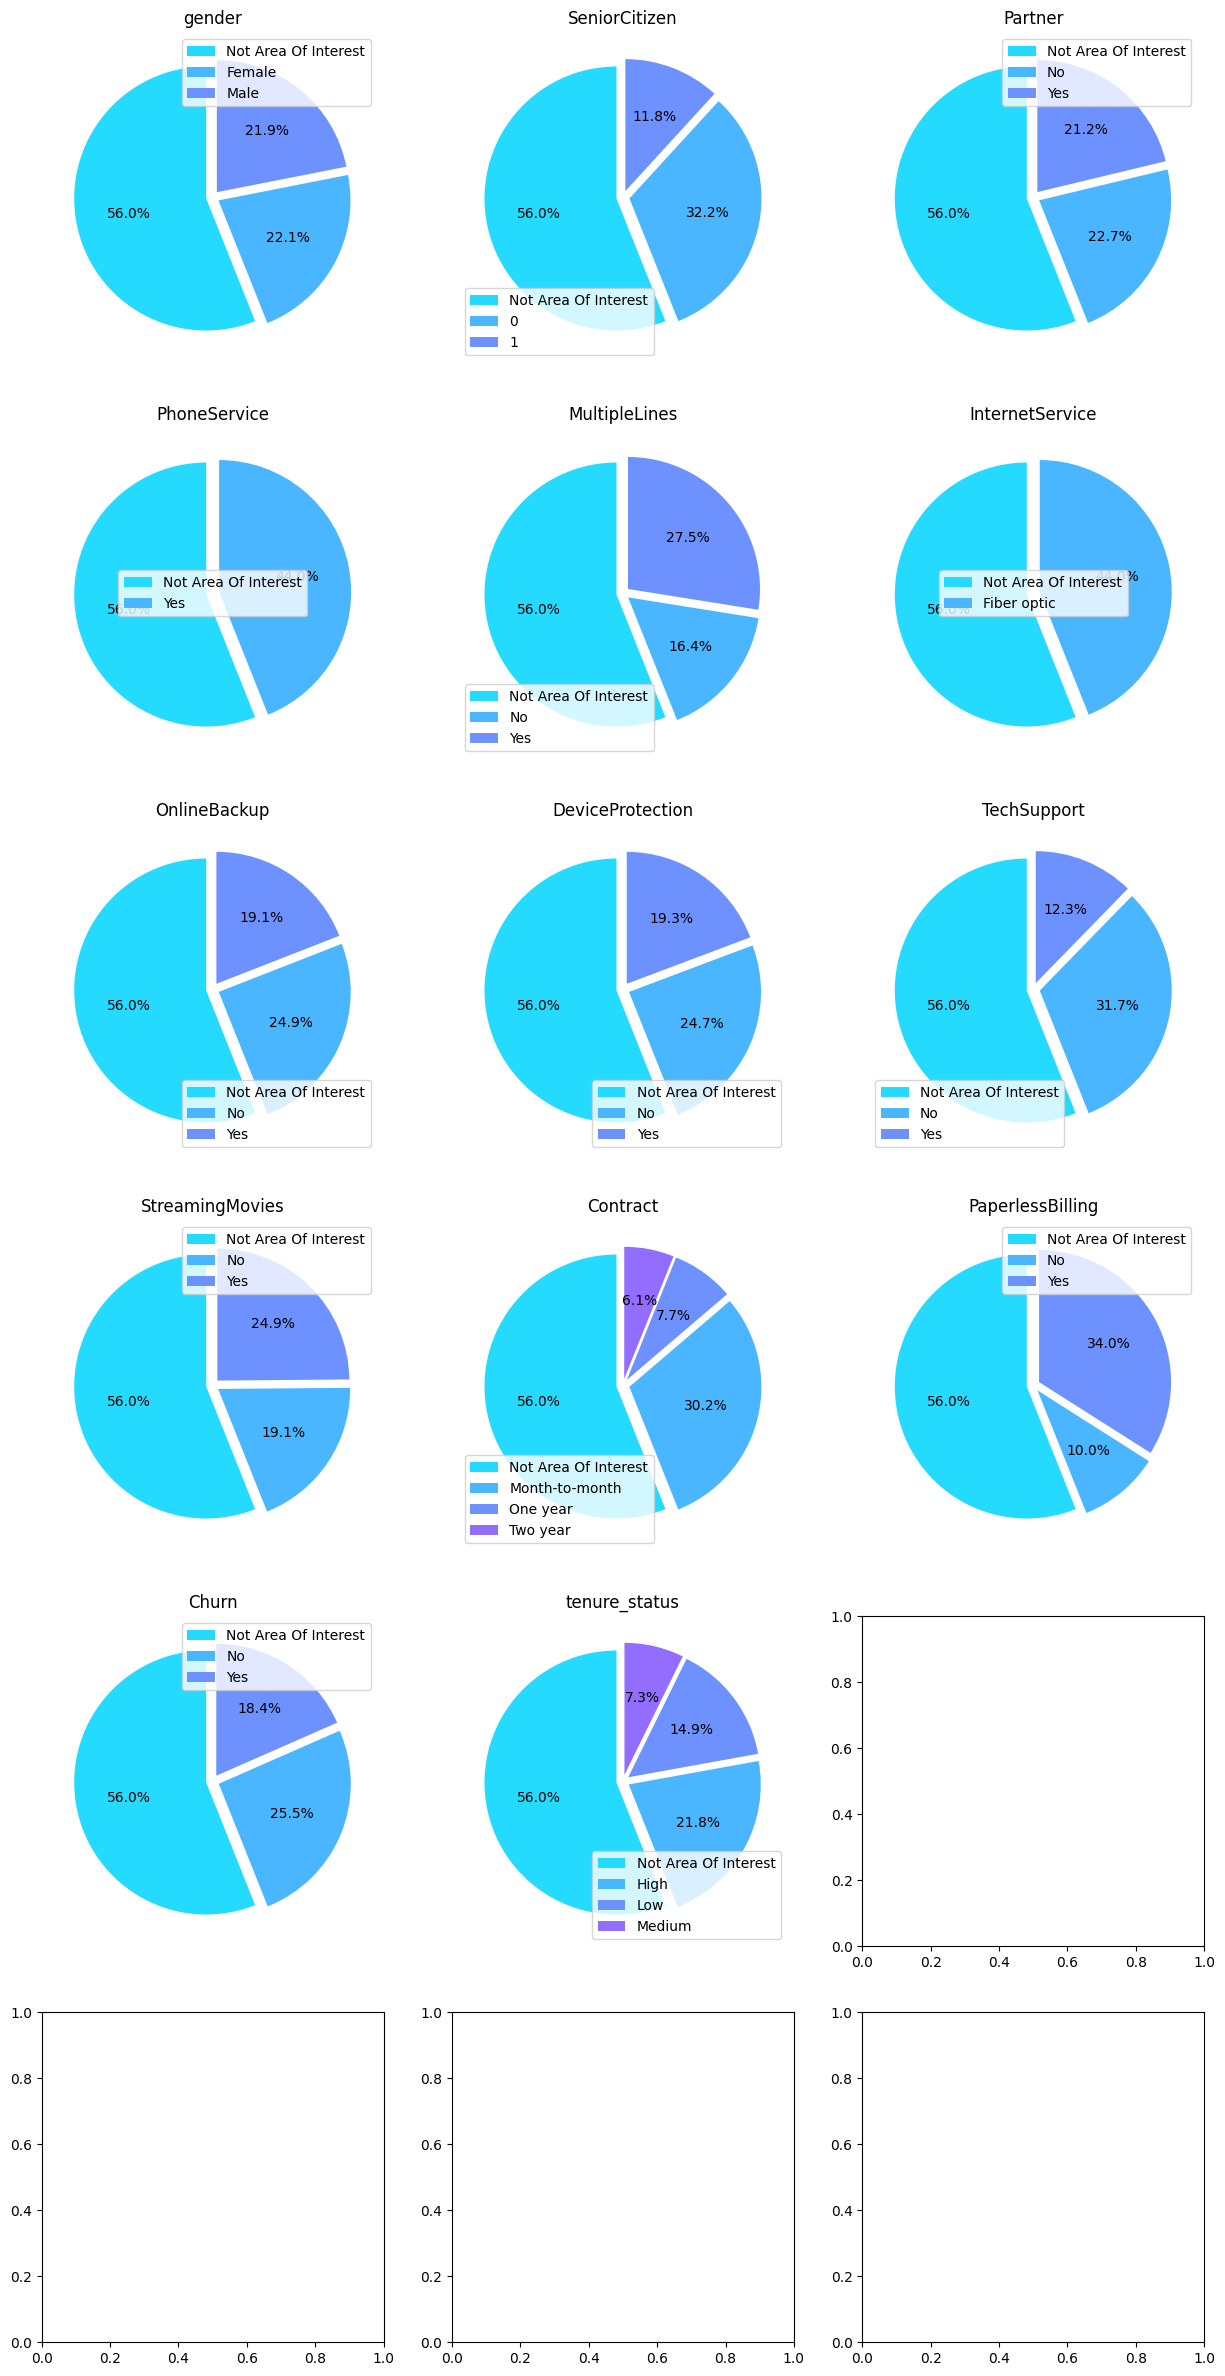

In [109]:
churn_rate_func(df=feature_df,compare_against_col='InternetService',intrest_val='Fiber optic')

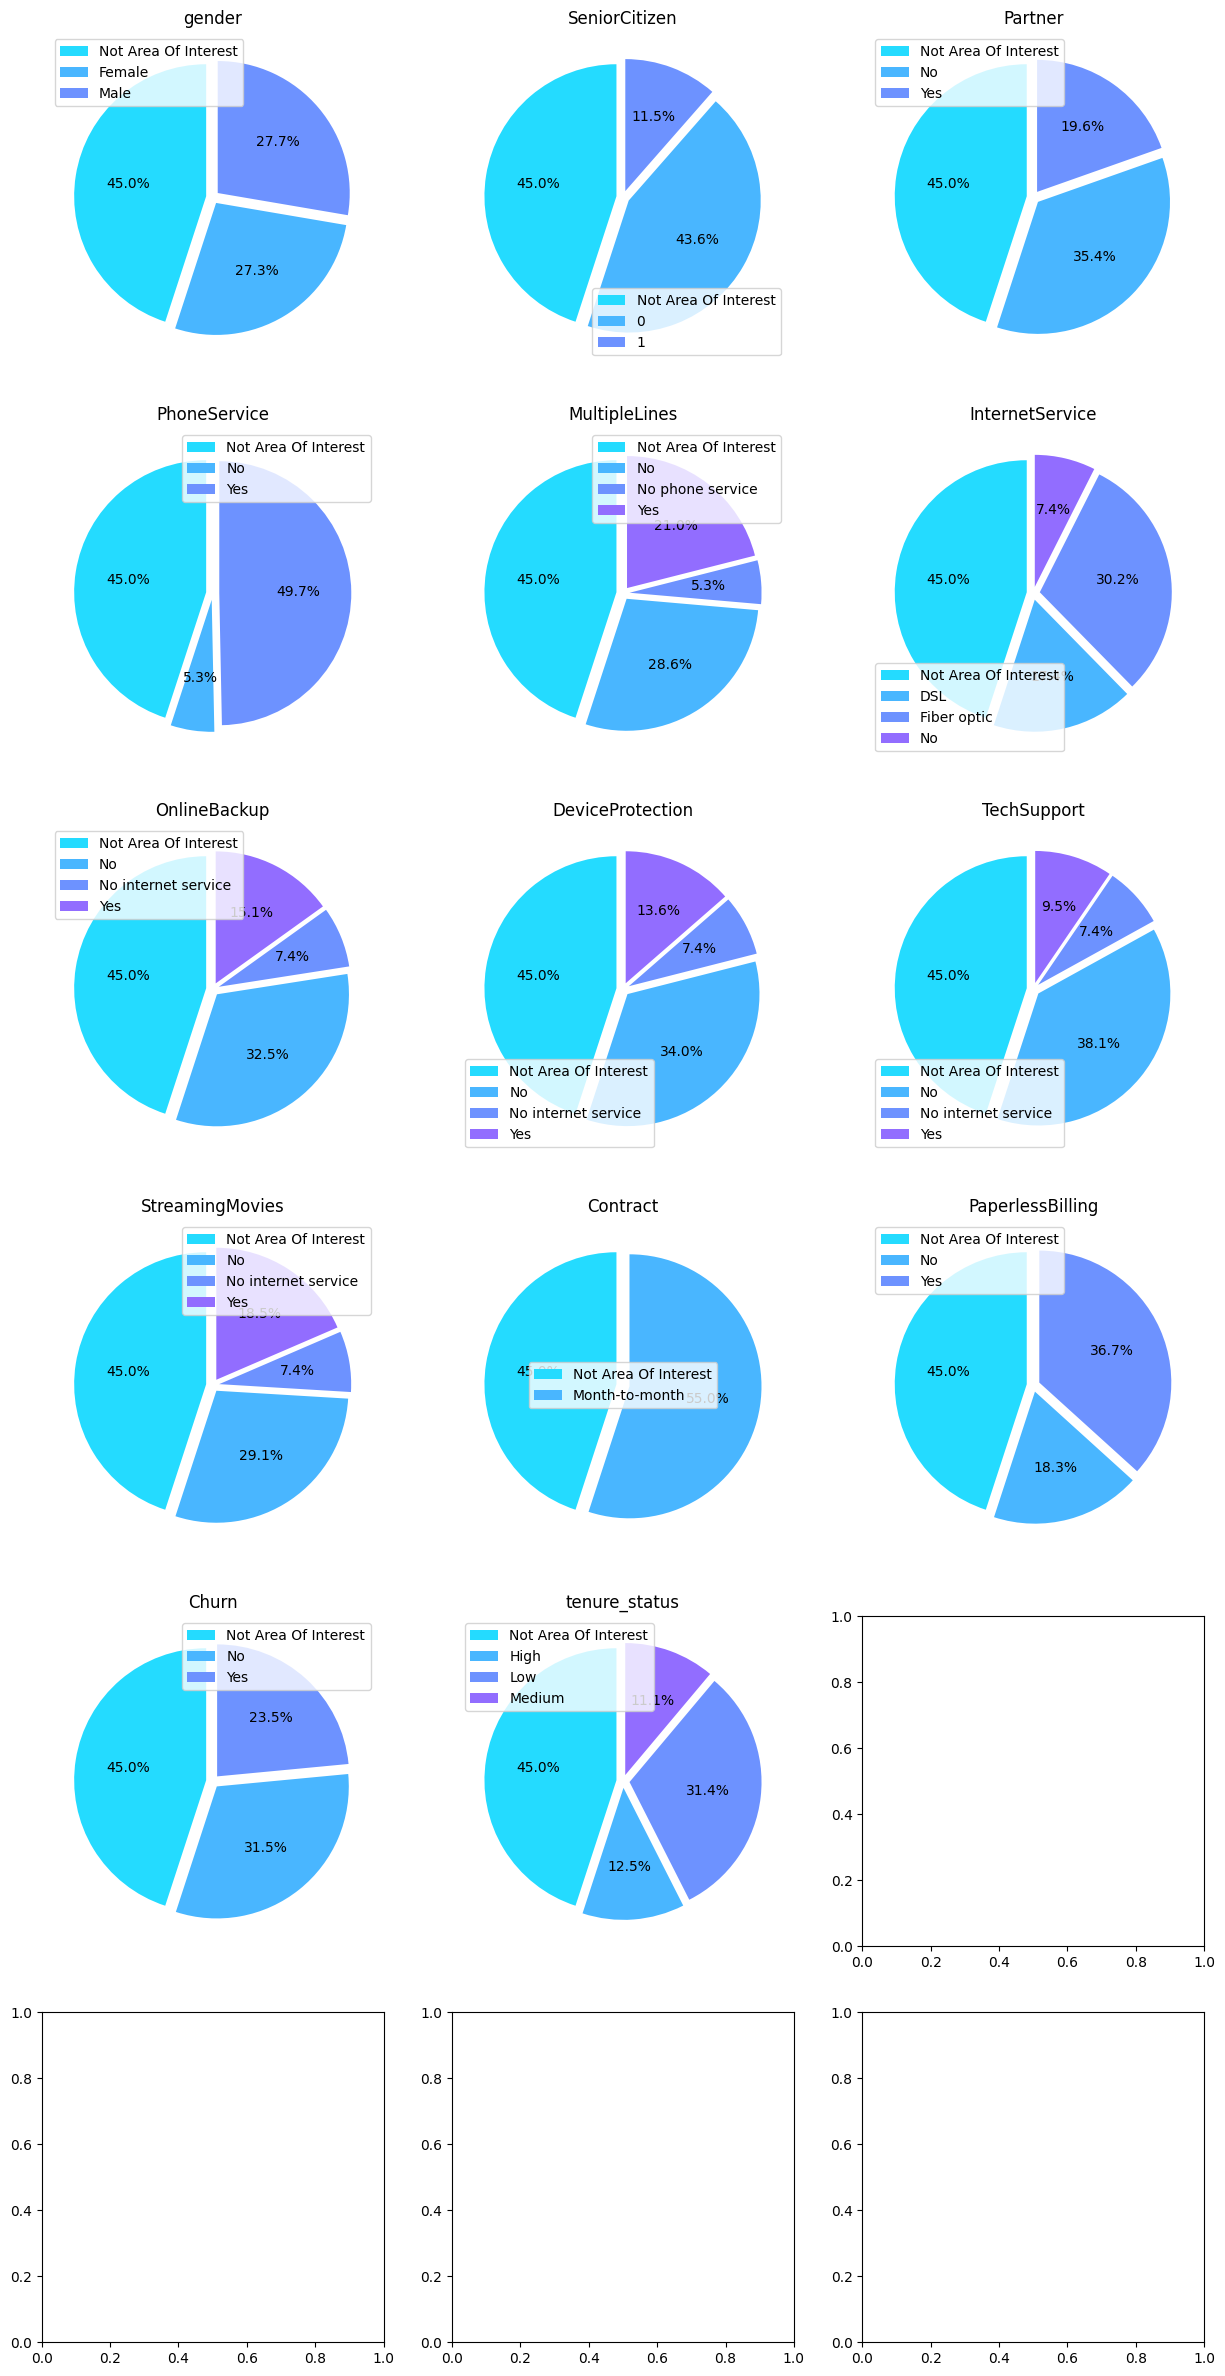

In [110]:
churn_rate_func(df=feature_df,compare_against_col='Contract',intrest_val='Month-to-month')

Observations:

    Internet Service
        1. Total Churned customer are 26.5%
        2. Among the Customers with fiber optics actually churned are 18.4% or approx 20%
        3. That might have affect churn rate for Online Backup, Device Protection and Tech Support
        4. Because the services to 44% fiber optic customers, 17.5% customers churned from 24.9% of No Online backup customers.
        5. Similarly, 17.2% and 20.5% of customers churned from 24.7% and 31.7% of No Device Protection and No Tech Support respectively.
        6. Hence, We need to resolve the fiber optics Internet Service customers.

    Contract and PaperlessBilling
        7. Among the 55% of Month-to-month cotract customers we have 36.7% PaperBilling customers.
        8. We have 23.5% Month-to-month and 19.9% Paperless billing customers that churned.
        9. Hence, we also need to resolve Month-to-month customers.

Suggetions:

    1. We need to be more focused on younger, single and non-dependednts group of customers.
    2. We need to introduce or advertise facilities such as online backups, device protection and tech support over fiber optic internet services.
    3. We need to encourage customers to opt for more that Month-to-month contract.
        We need to introduce or advertise 1-2 year contracts and its benifits to the customers.


For non-object Independent variable

In [111]:
df5= data.describe()
df5

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [112]:
len(data)

7043

###**Outliers**

In [113]:
#Outliers removal
#IQR = Q3 - Q1
##Q1=data.MonthlyCharges.quantile(.25)
##Q3=data.MonthlyCharges.quantile(.75)

min= df5.loc['min']['MonthlyCharges']
Q1= df5.loc['25%']['MonthlyCharges']
Q3= df5.loc['75%']['MonthlyCharges']
max= df5.loc['max']['MonthlyCharges']
IQR= Q3-Q1

Uppper_bound = Q3 + (1.5*IQR)
Lower_bound= Q1 - (1.5*IQR)

min,Q1,Q3,max,IQR,Uppper_bound,Lower_bound

(18.25, 35.5, 89.85, 118.75, 54.349999999999994, 171.375, -46.02499999999999)

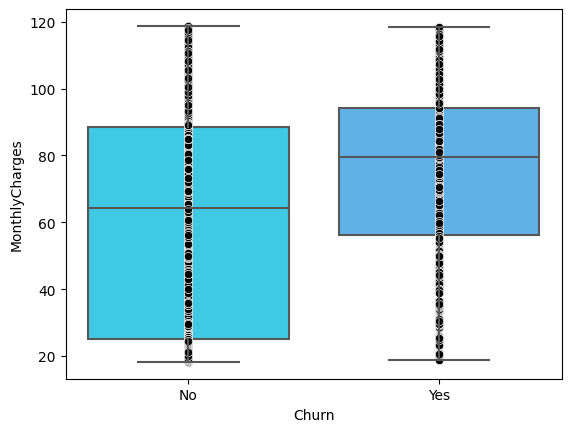

In [114]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
sns.set_palette('cool')
sns.scatterplot(data=data, x= 'Churn', y='MonthlyCharges',color='black')
plt.show()

Since, we are able to see most of the values are between the upper bound and lower bound. Hence, we will not remove any values/rows

##Predictive Analytics

Since, we have seen that most how the independent variables depend on each other such as

    1. contract with paperless billing
    2. InternetService with Online Backup, Device Protection and Tech Support
    3. etc.

Thus, Multicollinearity exists.

One of the method to remove Multicollinearity is Principal Component Analysis (PCA).

    1. Do Label Encoding or One-hot Encoding
    2. Scale the variable to standard ranges i.e., Standardize or Z-Score
    3. Create a model and train-tranform the model.
    4. And then, pass further for classification

##PCA

PCA stands for Principal Component Analysis, which is a statistical technique used for dimensionality reduction in data analysis. It is used to transform a large set of correlated variables into a smaller set of uncorrelated variables, called principal components.

The main objective of PCA is to identify the underlying patterns and structure in the data, by capturing the most important information from the original variables.

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [116]:
filter_data= data.drop(columns=['customerID','Churn'],axis=1)

filter_data_col= filter_data.describe(include='object').columns.to_list()
filter_data =pd.get_dummies(data=filter_data, columns=filter_data_col,drop_first=True)    #One-Hot Encoding

In [117]:
filter_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_status_Low', 'tenure_status_Medium'],
      dtype='object')

In [118]:
x,y = filter_data, data.Churn

x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_status_Low,tenure_status_Medium
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [119]:
x.isnull().sum()

tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
SeniorCitizen_1                           0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [120]:
x.fillna(value=0, inplace=True)

In [121]:
x.isna().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

###Standardization

In [122]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_std= scaler.fit_transform(x)
x_std

array([[-1.27744458, -1.16032292, -0.99261052, ..., -0.54480692,
         1.36066785, -0.44656576],
       [ 0.06632742, -0.25962894, -0.17216471, ...,  1.83551265,
        -0.73493322, -0.44656576],
       [-1.23672422, -0.36266036, -0.9580659 , ...,  1.83551265,
         1.36066785, -0.44656576],
       ...,
       [-0.87024095, -1.1686319 , -0.85293201, ..., -0.54480692,
         1.36066785, -0.44656576],
       [-1.15528349,  0.32033821, -0.87051315, ...,  1.83551265,
         1.36066785, -0.44656576],
       [ 1.36937906,  1.35896134,  2.01389665, ..., -0.54480692,
        -0.73493322, -0.44656576]])

###PCA

In [123]:
#PCA
from sklearn.decomposition import PCA

pca_dmp=PCA(n_components=10)
x_pca=pca_dmp.fit_transform(x_std)
x_pca

array([[-0.31581311, -3.26625801,  3.60143731, ..., -0.75484111,
         1.05646503,  0.78428558],
       [-0.24731891, -0.41986023,  1.28885352, ..., -0.05743677,
        -1.06291678,  1.26089779],
       [-0.04936885, -2.45439001,  0.86961461, ...,  0.42319471,
        -0.92639461,  1.08407301],
       ...,
       [-0.23344244, -2.64996234,  4.1142189 , ..., -0.96473178,
         1.09599054,  0.59499521],
       [-0.50531055, -2.45473522, -1.34413105, ...,  0.51067655,
        -1.06340223,  1.99194108],
       [-3.08232239,  2.25084326, -0.11704403, ...,  1.06627733,
        -1.00882566, -1.27701883]])

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

###Logistic Regression Model

In [126]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [127]:
# Make predictions on the trining set and evaluate the model
y_train_pred = lr.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[3733  405]
 [ 760  736]]
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      4138
         Yes       0.65      0.49      0.56      1496

    accuracy                           0.79      5634
   macro avg       0.74      0.70      0.71      5634
weighted avg       0.78      0.79      0.78      5634



In [128]:
# Make predictions on the testing set and evaluate the model
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[944  92]
 [190 183]]
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Hence, Model is performing well for both train an test set

###Support Vector Machine

In [129]:
# Train a Naive Bayes Model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [130]:
# Make predictions on the trining set and evaluate the model
y_train_pred = svc.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[3810  328]
 [ 787  709]]
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      4138
         Yes       0.68      0.47      0.56      1496

    accuracy                           0.80      5634
   macro avg       0.76      0.70      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [131]:
# Make predictions on the testing set and evaluate the model
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[958  78]
 [182 191]]
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.71      0.51      0.60       373

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.80      1409



***Model Selection***

*Hence, both the models are performing approximtely same. But, SVC's recall value for "Yes" is good in compare to Logistic Regression's.*

*Which states model is performing good in predicting actual churned costumers.*